# Road Map

Titanic -> California Housing -> Iris -> IMDN -> MNIST

Titanic: Preprocessing + Classic ML

California Housing: Regression & Feature Engineering

Iris: Multiclass + Visualization

IMDB: Text classification (TF-IDF -> LSTM)

MNIST: CNN fundamentals

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
test = pd.read_csv('Data/titanic/test.csv')
train = pd.read_csv('Data/titanic/train.csv')
gender_submission = pd.read_csv('Data/titanic/gender_submission.csv')

## Simple Analysis of the Data

In [6]:
print(train.shape)
print(train.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Simple Visualization

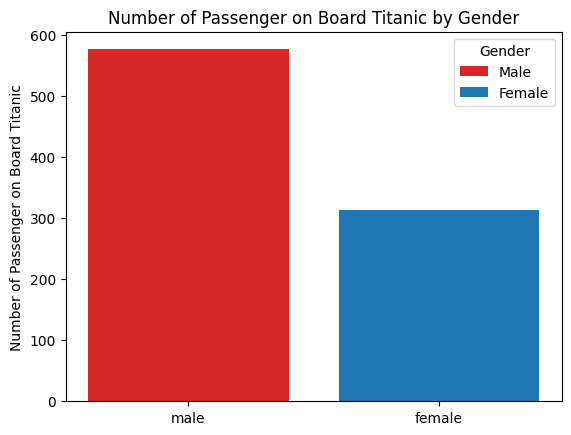

In [31]:
fig, ax = plt.subplots()
gender = list(train['Sex'].value_counts().index)
counts = [train['Sex'].value_counts()[item] for item in gender]
bar_labels = ['Male', 'Female']
bar_colors = ['tab:red', 'tab:blue']
ax.bar(gender, counts, label=bar_labels, color=bar_colors)
ax.set_ylabel('Number of Passenger on Board Titanic')
ax.set_title('Number of Passenger on Board Titanic by Gender')
ax.legend(title='Gender')
plt.show()

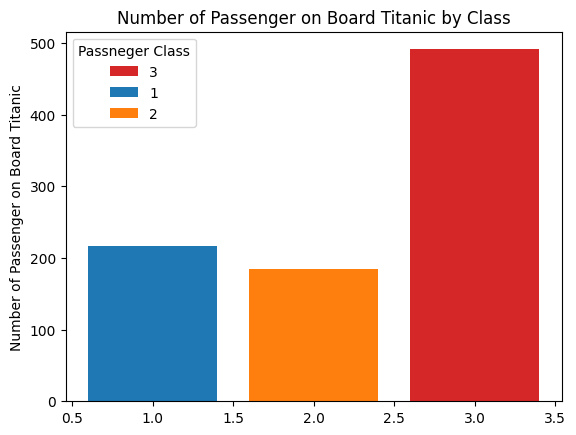

In [107]:
fig, ax = plt.subplots()
passenger_class = train['Pclass'].value_counts()
colors = ['red', 'blue', 'orange']
colors = {str(passenger_class.index[i]):'tab:'+colors[i] for i in range(len(passenger_class))}
for p in passenger_class.index:
    ax.bar(p, passenger_class[p], color=colors[str(p)], label=p)
ax.set_ylabel('Number of Passenger on Board Titanic')
ax.set_title('Number of Passenger on Board Titanic by Class')
ax.legend(title='Passneger Class')
plt.show()

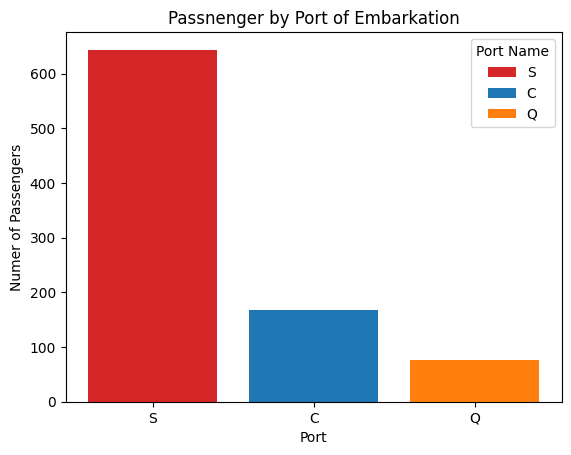

In [108]:
fig, ax = plt.subplots()
embarked = train['Embarked'].value_counts()
colors = ['red', 'blue', 'orange']
colors = {embarked.index[i]:'tab:'+colors[i] for i in range(len(embarked))}
for e in embarked.index:
    ax.bar(e, embarked[e], color= colors[e], label=e)
ax.set_title('Passnenger by Port of Embarkation')
ax.set_ylabel('Numer of Passengers')
ax.set_xlabel('Port')
ax.legend(title='Port Name')
plt.show()

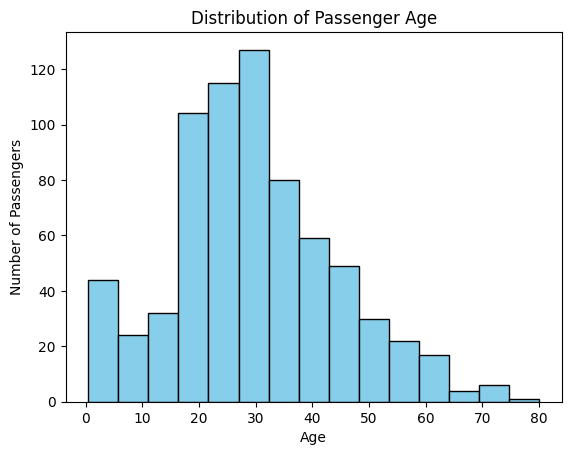

In [109]:
plt.hist(x=train['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

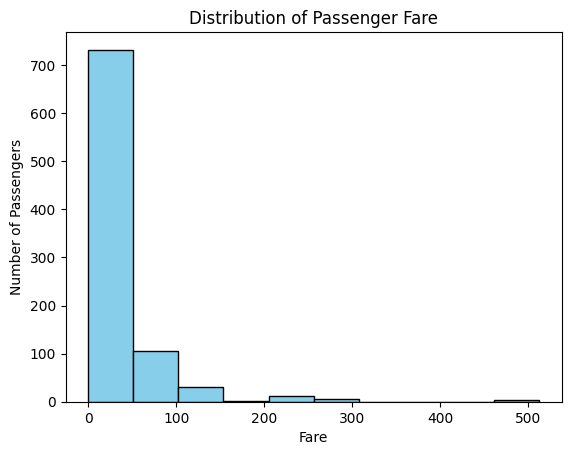

In [110]:
plt.hist(x=train['Fare'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Passenger Fare")
plt.xlabel("Fare")
plt.ylabel('Number of Passengers')
plt.show()

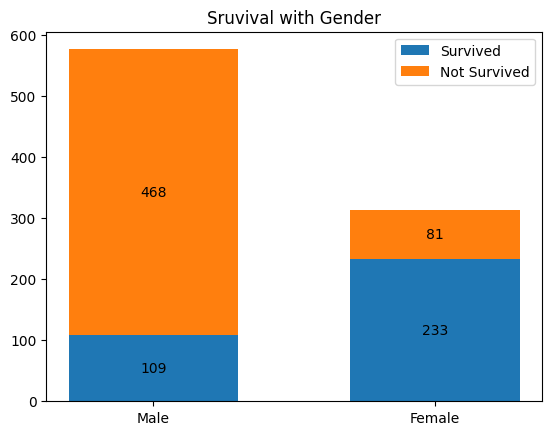

In [111]:
sex = ('Male', 'Female')
survival_counts = {
    'Survived': np.array([train[(train['Sex'] == 'male') & (train['Survived'] == 1)].shape[0],
                train[(train['Sex'] == 'female') & (train['Survived'] == 1)].shape[0]]),
    'Not Survived': np.array([train[(train['Sex'] == 'male') & (train['Survived'] == 0)].shape[0],
                train[(train['Sex'] == 'female') & (train['Survived'] == 0)].shape[0]])
}
width = 0.6

fig, ax = plt.subplots()
bottom = np.zeros(2)
for key, value in survival_counts.items():
    p = ax.bar(sex, value, width, label=key, bottom=bottom)
    bottom += value

    ax.bar_label(p, label_type='center')

ax.set_title("Sruvival with Gender")
ax.legend()

plt.show()

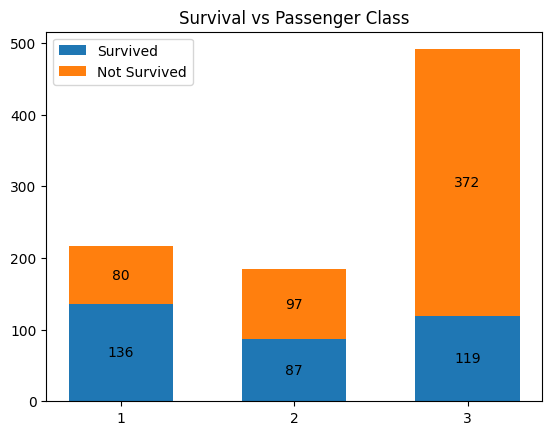

In [123]:
passenger_class = ('1', '2', '3')
survival_counts = {
    'Survived': np.array([train[(train['Survived'] == 1) & (train['Pclass'] == 1)].shape[0],
                          train[(train['Survived'] == 1) & (train['Pclass'] == 2)].shape[0],
                          train[(train['Survived'] == 1) & (train['Pclass'] == 3)].shape[0]]),
    'Not Survived': np.array([train[(train['Survived'] == 0) & (train['Pclass'] == 1)].shape[0],
                              train[(train['Survived'] == 0) & (train['Pclass'] == 2)].shape[0],
                              train[(train['Survived'] == 0) & (train['Pclass'] == 3)].shape[0]])
}
width = 0.6
bottom = np.zeros(3)
fig, ax = plt.subplots()

for key, value in survival_counts.items():
    p = ax.bar(passenger_class, value, width, label=key, bottom=bottom)
    bottom += value

    ax.bar_label(p, label_type='center')


ax.set_title('Survival vs Passenger Class')
ax.legend()

plt.show()

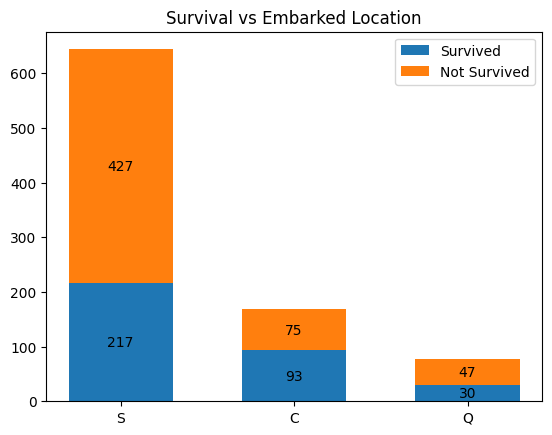

In [131]:
embarked = ('S', 'C', 'Q')
survival_counts = {
    'Survived': np.array([train[(train['Survived'] == 1) & (train['Embarked'] == 'S')].shape[0],
                          train[(train['Survived'] == 1) & (train['Embarked'] == 'C')].shape[0],
                          train[(train['Survived'] == 1) & (train['Embarked'] == 'Q')].shape[0]]),
    'Not Survived': np.array([train[(train['Survived'] == 0) & (train['Embarked'] == 'S')].shape[0],
                              train[(train['Survived'] == 0) & (train['Embarked'] == 'C')].shape[0],
                              train[(train['Survived'] == 0) & (train['Embarked'] == 'Q')].shape[0]])
}
width = 0.6
bottom = np.zeros(3)
fig, ax = plt.subplots()

for key, value in survival_counts.items():
    p = ax.bar(embarked, value, width, label=key, bottom=bottom)
    bottom += value

    ax.bar_label(p, label_type='center')

ax.set_title('Survival vs Embarked Location')
ax.legend()

plt.show()

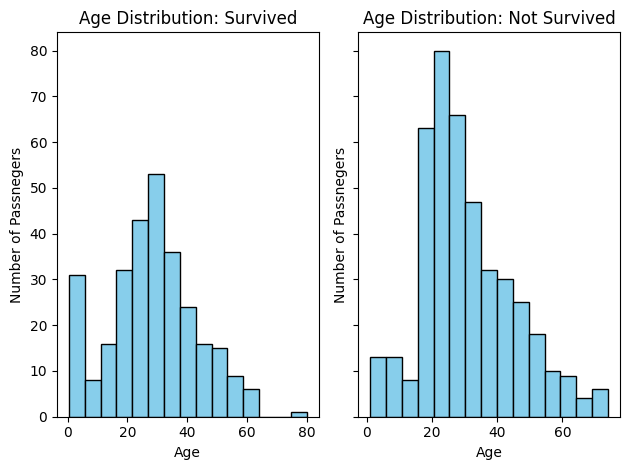

In [138]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True )
axs[0].hist(train[(train['Survived'] == 1)]['Age'], bins=15, color='skyblue', edgecolor='black')
axs[0].set_title('Age Distribution: Survived')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Number of Passnegers')

axs[1].hist(train[(train['Survived'] == 0)]['Age'], bins=15, color='skyblue', edgecolor='black')
axs[1].set_title('Age Distribution: Not Survived')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Number of Passnegers')

plt.show()

Text(0, 0.5, 'Number of Passangers')

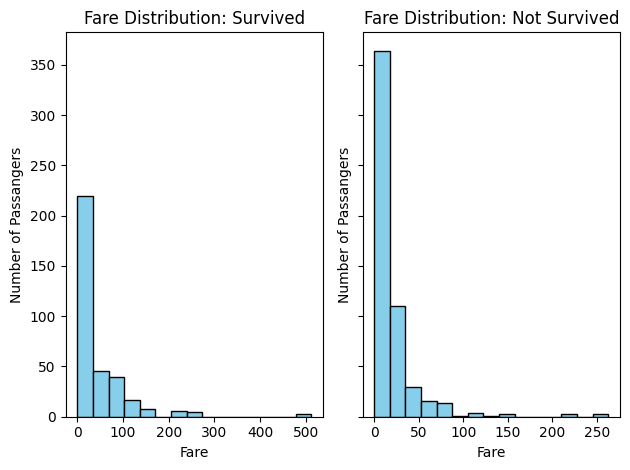

In [140]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(train[(train['Survived'] == 1)]['Fare'], bins=15, color='skyblue', edgecolor='black')
axs[0].set_title('Fare Distribution: Survived')
axs[0].set_xlabel('Fare')
axs[0].set_ylabel('Number of Passangers')

axs[1].hist(train[(train['Survived'] == 0)]['Fare'], bins=15, color='skyblue', edgecolor='black')
axs[1].set_title('Fare Distribution: Not Survived')
axs[1].set_xlabel('Fare')
axs[1].set_ylabel('Number of Passangers')

In [155]:
train_corr = train.copy()
train_corr.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train_corr['Sex'] = train_corr['Sex'].apply(lambda x: 1 if x == 'male' else 0)

def sort_embark(x):
    if x == 'S':
        return 1
    elif x == 'C':
        return 2
    elif x == 'Q':
        return 3
    else:
        return -1
train_corr['Embarked'] =  train_corr['Embarked'].apply(lambda x: sort_embark(x))
train_corr.corr(method='pearson')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.096412
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.055929
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.105409
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.004755
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.055771
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.074204
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.054523
Embarked,0.096412,0.055929,-0.105409,-0.004755,-0.055771,-0.074204,0.054523,1.000000


<Axes: >

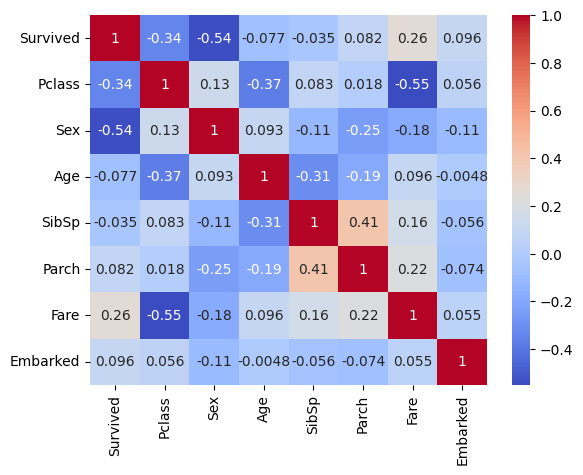

In [163]:
sns.heatmap(train_corr.corr(), annot=True, cmap='coolwarm')

## Data Preprocessing

In [234]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [235]:
train_cleaned = train.copy()
test_cleaned = test.copy()

In [236]:
# Converted categorical columns to numerical column
# Cabin -> Has Cabin
# Sex -> 1 for male and 0 for female
# Embarked -> 1 for S, 2 for C, and 3 for Q
train_cleaned['Has Cabin'] = train_cleaned['Cabin'].notna().astype(int)
test_cleaned['Has Cabin'] = test_cleaned['Cabin'].notna().astype(int)

train_cleaned['Sex'] = train_cleaned['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test_cleaned['Sex'] = test_cleaned['Sex'].apply(lambda x: 1 if x == 'male' else 0)
def sort_embark(x):
    if x == 'S':
        return 1
    elif x == 'C':
        return 2
    elif x == 'Q':
        return 3
    else:
        return -1
train_cleaned['Embarked'] = train_cleaned['Embarked'].apply(lambda x: sort_embark(x))
test_cleaned['Embarked'] = test_cleaned['Embarked'].apply(lambda x: sort_embark(x))

# Fill the age with median
train_age_median = train_cleaned['Age'].median()
train_cleaned['Age'] = train_cleaned['Age'].fillna(train_age_median)
test_age_median = test_cleaned['Age'].median()
test_cleaned['Age'] = test_cleaned['Age'].fillna(test_age_median)

# Fill the fare with median for test dataset
test_cleaned['Fare'] = test_cleaned['Fare'].fillna(test_cleaned['Fare'].median())

# Drop unused columns PassangerId, Name, Ticket and Cabin
train_cleaned.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_cleaned.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [237]:
train_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has Cabin
0,0,3,1,22.0,1,0,7.2500,1,0
1,1,1,0,38.0,1,0,71.2833,2,1
2,1,3,0,26.0,0,0,7.9250,1,0
3,1,1,0,35.0,1,0,53.1000,1,1
4,0,3,1,35.0,0,0,8.0500,1,0


In [238]:
test_cleaned.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has Cabin
0,3,1,34.5,0,0,7.8292,3,0
1,3,0,47.0,1,0,7.0000,1,0
2,2,1,62.0,0,0,9.6875,3,0
3,3,1,27.0,0,0,8.6625,1,0
4,3,0,22.0,1,1,12.2875,1,0


### RandomForestClassifier

In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Setup the dataset for processing
train_x = train_cleaned.drop(columns=['Survived'], axis=1)
train_y = train_cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=train_y)

# Get the model
rfc = RandomForestClassifier(n_estimators=300,
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             random_state=42,
                             n_jobs=-1)
rfc.fit(X_train, y_train)

# Predict the validation
rfc_prediction = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_prediction)
print(f"Accuracy: {rfc_accuracy}")
print(confusion_matrix(y_test, rfc_prediction))
print(classification_report(y_test, rfc_prediction, digits=3))



Accuracy: 0.7877094972067039
[[91 19]
 [19 50]]
              precision    recall  f1-score   support

           0      0.827     0.827     0.827       110
           1      0.725     0.725     0.725        69

    accuracy                          0.788       179
   macro avg      0.776     0.776     0.776       179
weighted avg      0.788     0.788     0.788       179



### LogisticRegression

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Setup the dataset for training
train_x = train_cleaned.drop(columns=['Survived'], axis=1)
train_y = train_cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2,
                                                    random_state=42)

# Scale the dataset for logistic regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict
lr_predict = lr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, lr_predict)}")
print(confusion_matrix(y_test, lr_predict))
print(classification_report(y_test, lr_predict, digits=3))

Accuracy: 0.8100558659217877
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0      0.826     0.857     0.841       105
           1      0.786     0.743     0.764        74

    accuracy                          0.810       179
   macro avg      0.806     0.800     0.803       179
weighted avg      0.809     0.810     0.809       179



### Neural Network